### Mini Batch GD - subset of training examples before making update to Gradient/Theta instead of "full training set making update to Gradient/Theta"

### 1 Epoch means 1 Complete iteration of full training data set

### 1 EPOCH will compute now Gradient over say 10 Mini Batches of full training data set, After each mini - batch , you'll make an update to model parameters theta

### More updates to theta - implies faster convergence

### Trajectory(of Loss fn w.r.t time because of theta updates) may not be smooth but faster. theta updates could be noisy but they will acheive local minima much earlier because of increased frequency of theta updates,

### In each batch(one full training example set), you do multiple updates, every update alters the value of theta(, which cause loss fn to update faster)

In [1]:
# PSEUDOCODE
# for  e in range(MAX_ITRS): # each epoch
#     shuffle(data)
#     total_num_of_batches = m_training_examples / batch_size
#     for batch in total_num_of_batches:
#         x', y' = load_batch(); # this also let us load only the amt of data which is within the capacity of system RAM
#         grad = calc_grad(x', y')
#         theta = theta - learning_rate * grad


Mini Batch Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression



In [3]:
X, Y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

#Normalisation
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-u)/std # subtract every row by a vector - Both X and u must have same number of columns

In [4]:
u

array([ 0.01612707,  0.00723458,  0.00611644, -0.00692588,  0.0106941 ,
        0.00675677, -0.01343271,  0.00861393,  0.00512147,  0.01646118,
       -0.00612021,  0.01556637, -0.00031895, -0.00621469,  0.01494578,
       -0.00690553,  0.01234048,  0.00933886,  0.00410199, -0.00412744])

In [5]:
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[ 1.03275756 -1.76377421  2.69585985 ... -0.4483389   0.71877778
  -0.320901  ]
 [-0.90782914 -1.60671489  0.17274091 ... -0.29086731 -0.53381879
  -1.51439762]
 [ 0.66031843 -0.08297356 -0.1221399  ... -0.04227815 -0.44594871
   0.07507493]
 ...
 [ 0.27303126  1.44235162  0.52755414 ... -0.82930385  1.88966858
  -0.18557702]
 [-0.94563085 -0.81783544 -0.01168129 ... -1.41872758  0.03628514
   0.50465491]
 [-0.12035308 -0.84512598 -0.41880229 ...  0.52490686 -1.42708202
  -0.79543934]]
[-266.04431688 -612.47413983 -152.69899814 ...  174.41140681   57.42759871
  122.254407  ]
(10000, 20)
(10000,)


In [6]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X.shape)
print(Y.shape)
print(X)

(10000, 21)
(10000,)
[[ 1.          1.03275756 -1.76377421 ... -0.4483389   0.71877778
  -0.320901  ]
 [ 1.         -0.90782914 -1.60671489 ... -0.29086731 -0.53381879
  -1.51439762]
 [ 1.          0.66031843 -0.08297356 ... -0.04227815 -0.44594871
   0.07507493]
 ...
 [ 1.          0.27303126  1.44235162 ... -0.82930385  1.88966858
  -0.18557702]
 [ 1.         -0.94563085 -0.81783544 ... -1.41872758  0.03628514
   0.50465491]
 [ 1.         -0.12035308 -0.84512598 ...  0.52490686 -1.42708202
  -0.79543934]]


### IN GRADIENT - we do - (PREDICTED - ACTUAL/OBSERVED)

In [7]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, Y, theta):
    Yhat = hypothesis(X, theta)
    total_error = np.sum((Y - Yhat)**2)
    return total_error/X.shape[0]

def gradient(X, Y, theta):
    Yhat = hypothesis(X, theta)
    grad = np.dot(X.T, (Yhat - Y))
    return grad/X.shape[0]

In [10]:
X

array([[ 1.        ,  1.03275756, -1.76377421, ..., -0.4483389 ,
         0.71877778, -0.320901  ],
       [ 1.        , -0.90782914, -1.60671489, ..., -0.29086731,
        -0.53381879, -1.51439762],
       [ 1.        ,  0.66031843, -0.08297356, ..., -0.04227815,
        -0.44594871,  0.07507493],
       ...,
       [ 1.        ,  0.27303126,  1.44235162, ..., -0.82930385,
         1.88966858, -0.18557702],
       [ 1.        , -0.94563085, -0.81783544, ..., -1.41872758,
         0.03628514,  0.50465491],
       [ 1.        , -0.12035308, -0.84512598, ...,  0.52490686,
        -1.42708202, -0.79543934]])

### Batch Gradient Descent - already learnt - compute gradient & updates on entire training set

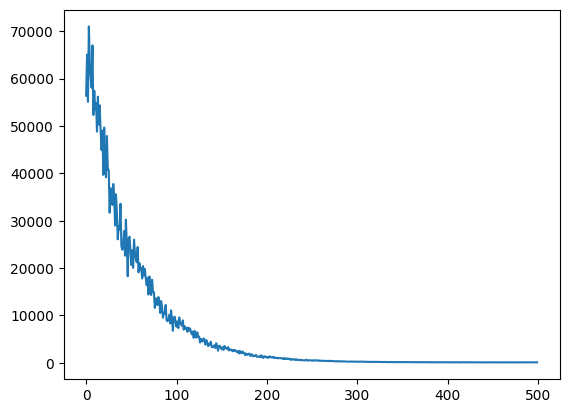

500


122.839196489087

In [53]:
### Mini Batch Gradient Descent

def miniBatchGD(X, Y, batch_size = 200, learning_rate = 0.01, max_epoch_iters = 10):
    theta = np.ones((X.shape[1],1))
    
    data_new = np.hstack((X, Y.reshape(-1,1))) # reshape Y vector to Y matrix
    np.random.shuffle(data_new) # SHUFFLES data directly into the same original buffer
    # print(data_new)
    total_batch_count = round(X.shape[0] / batch_size) #10000/100 = 100
    error_list = []
    for epoch in range(max_epoch_iters):
        for batch_idx in range(total_batch_count):
            batch_data = data_new[batch_idx*batch_size:(batch_idx*batch_size + batch_size),:]
            # print(batch_data.shape)
            X_new_subset = batch_data[:, :X.shape[1]]
            Y_new_subset = batch_data[:, X.shape[1]:]
            # print(X_new_subset.shape)
            # print(Y_new_subset.shape)
            error_list.append(error(X_new_subset, Y_new_subset, theta))
            batch_grad = gradient(X_new_subset, Y_new_subset, theta)
            theta = theta - learning_rate * batch_grad
            # break

    return error_list, theta

error_list, theta = miniBatchGD(X, Y)
plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()
print(len(error_list))
error_list[-1]
            


In [54]:
error_list

[56396.257463427464,
 65046.54648243826,
 55091.28273772644,
 70989.84223650966,
 63811.84656927012,
 60103.699105470536,
 58048.40859168086,
 66991.46388528323,
 52309.45827196424,
 57438.45772717977,
 53485.80746816587,
 54903.3076371279,
 48795.44947436538,
 56173.70967149313,
 50292.96482223442,
 54332.57283754547,
 48970.450850254914,
 44922.29576108992,
 49017.99609544836,
 39678.797261949054,
 49652.36185366127,
 41528.913375310825,
 39164.888936094154,
 47877.063355688326,
 40758.652881765796,
 40716.31095289482,
 31697.773280766494,
 36885.06745295279,
 33834.65086634893,
 33317.01518571054,
 37757.64324191079,
 35457.85278891925,
 28963.198148297743,
 35568.843878797576,
 31913.09296074891,
 26078.08073584327,
 28850.453500786807,
 28154.732212397565,
 33590.063609108,
 24625.344170289376,
 23867.807014018334,
 24807.455445574353,
 27821.457721922267,
 22617.37822171959,
 30219.953148232074,
 25268.192574519486,
 18273.01535407475,
 26209.293186755505,
 26624.294600702193,
 2

In [ ]:
data_new = np.hstack((X, Y.reshape(-1,1)))
batch_data = data_new[0*3:(0*3 + 3),:]
batch_data

In [ ]:
Y

In [ ]:
error_list, theta = miniBatchGD(X, Y)
plt.plot(error_list)

Note: 
1. In one epoch, magnitude of update to theta is much higher in mini batch grad decent than regular batch GD, that's why it takes less number of epochs to converge.
2. Loss fn trajectory ll be noisy
3. batch_size = 1 -> stochastic GD -> num_updates = num_epochs * (num_examples/batch_size) = 10 * (10000/1) = 100000
4. batch_size = num_examples -> regular batch classic GD

miniBatchGD advantages -
1. Faster convergence
2. Neural network - non convex loss fn - it's popular choice - Noisy updates help to avoid local minima
3. more robust convergence
4. vectorization benefit over stochastic GD 
5. No need to store entire dataset in the memory at the same time